In [ ]:
preds_top = np.load('preds_top.npy')
preds_top = [i[0][0][0] for i in preds_top]
print ('Type',type(preds_top),'Shape',len(preds_top))

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pickle

In [3]:
with open('./LUNA_model_v3/dict_top_voxels_predict.pickle', 'rb') as handle:
    plotting = pickle.load(handle)
plotting[list(plotting.keys())[0]].keys()

dict_keys(['preds', 1, 'top_voxels', 'max_malig', 'top_ixs'])

In [5]:
predictions = [x[0] for x in plotting['243038f7bb7787497c59bc17f04c6ed9'][1]]
print ('Length of predictions..',len(predictions))
malignancy = plotting['243038f7bb7787497c59bc17f04c6ed9']['max_malig']
print ('Maximum malignancy of original patch..',malignancy)

Length of predictions.. 262144
Maximum malignancy of original patch.. 0.466551721096


Differences between predicted and original voxel range from -0.00536236166954 to -0.00520834326744


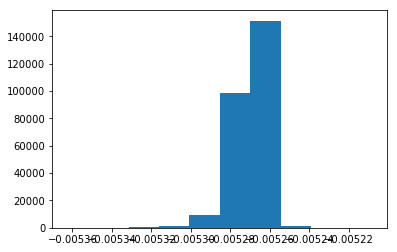

In [7]:
predictions_difference = [malignancy-p for p in predictions]
print ('Differences between predicted and original voxel range from', min(predictions_difference),'to',max(predictions_difference))
plt.hist(predictions_difference)
plt.show()

In [8]:
above005 = sum(i > .005 for i in predictions_difference)
above005

0

In [ ]:
len(preds_top_delta)

In [ ]:
above005/len(preds_top_delta)

In [ ]:
TOP_PIXELS = above005.copy()
pixel_ixs = np.argsort(preds_top_delta,axis=0)[-TOP_PIXELS:]
pixel_ixs

In [ ]:
def plot_3d(image, threshold=0.9):
    
    from mpl_toolkits.mplot3d.art3d import Poly3DCollection
    from skimage import measure
    
    verts, faces,_,_ = measure.marching_cubes(image, threshold)

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    mesh = Poly3DCollection(verts[faces], alpha=0.70)
    face_color = [0.45, 0.45, 0.75]
    mesh.set_facecolor(face_color)
    ax.add_collection3d(mesh)

    ax.set_xlim(0, image.shape[0])
    ax.set_ylim(0, image.shape[1])
    ax.set_zlim(0, image.shape[2])

    plt.show()

In [ ]:
def patient_spacing(path):
    import dicom as dicom
    slices = [dicom.read_file(path + '/' + s) for s in os.listdir(path)]
    slices.sort(key = lambda x: float(x.ImagePositionPatient[2]))
    
    # The Image Position specifies the x, y, and z coords of the upper left hand corner of the image
    z_depths = [s.ImagePositionPatient[2] for s in slices]
    if len(set(z_depths))<len(z_depths):
        print ('Duplicate slices for same z-depth - ID:',path[-32:])
        slices.sort(key = lambda x: x.InstanceNumber)
        acq_num = int(np.mean([s.AcquisitionNumber for s in slices]))
        slices = [s for s in slices if s.AcquisitionNumber==acq_num]

    slice_thickness = np.abs(slices[0].ImagePositionPatient[2] - slices[1].ImagePositionPatient[2])
    
    for s in slices:
        s.SliceThickness = slice_thickness
        
    spacing = np.array(slices[0].PixelSpacing + [slices[0].SliceThickness], dtype=np.float32)
    return spacing

In [ ]:
path_raw = '/home/gantos/data/stage1/'
patient_slice_thickness = patient_spacing(path_raw+patient[:-4])
patient_slice_thickness

In [ ]:
patient_full = np.load('../data/stage1_arrays/'+patient[:-4]+'.npy')

In [ ]:
count = -1
patient_blank = np.zeros(np.squeeze(top_voxel).shape)
for e in np.nditer(patient_blank, op_flags=['readwrite']):
    count += 1
    if count in pixel_ixs:
        e[...] = 1
    else:
        continue

In [ ]:
patient_blank.shape

In [ ]:
np.sum(patient_blank)

In [ ]:
plot_3d(patient_blank)

In [ ]:
above010 = sum(i > .01 for i in preds_top_delta)
above010

In [ ]:
TOP_PIXELS = above010.copy()
pixel_ixs = np.argsort(preds_top_delta,axis=0)[-TOP_PIXELS:]
pixel_ixs

In [ ]:
count = -1
patient_blank_010 = np.zeros(np.squeeze(top_voxel).shape)
for e in np.nditer(patient_blank_010, op_flags=['readwrite']):
    count += 1
    if count in pixel_ixs:
        e[...] = 1
    else:
        continue

In [ ]:
plot_3d(patient_blank_010)